In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
import os
files = []
for file in os.listdir("Dataset_Health_Insurance"):
    file_path = os.path.join("Dataset_Health_Insurance", file)
    files.append(file_path)

In [3]:
import pandas as pd
claims_code = pd.read_csv(files[0])
claims_code.head()

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION,Unnamed: 3
0,0010,Cholera due to vibrio cholerae,Cholera d/t vib cholerae,NaN
1,0011,Cholera due to vibrio cholerae el tor,Cholera d/t vib el tor,NaN
2,0019,"Cholera, unspecified",Cholera NOS,NaN
3,0020,Typhoid fever,Typhoid fever,NaN
4,0021,Paratyphoid fever A,Paratyphoid fever a,NaN


In [4]:
df_test = pd.read_csv(files[1])
df_test.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [5]:
df_test_beneficiary_data = pd.read_csv(files[2])
df_test_beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [6]:
df_train_inpatient_data = pd.read_csv(files[3])
df_train_inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_train_outpatient_data = pd.read_csv(files[4])
df_train_outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [8]:
df_train = pd.read_csv(files[5])
df_train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [9]:
df_train_beneficiary_data = pd.read_csv(files[6])
df_train_beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [10]:
df_train_inpatient_data = pd.read_csv(files[7])
df_train_inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [11]:
df_train_outpatient_data = pd.read_csv(files[8])
df_train_outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


### Data Wrangling

In [12]:
# replace 2 to 0 for the chronic conditions to indicate False.
df_train_beneficiary_data = df_train_beneficiary_data.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                               'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                               'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                               'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)


In [13]:
# For RenalDiseaseIndicator replacing 'Y' with 1
df_train_beneficiary_data = df_train_beneficiary_data.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [14]:
# convert all these columns datatypes to numeric
df_train_beneficiary_data[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] =df_train_beneficiary_data[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

In [15]:
df_train_beneficiary_data['Patient_Risk_Score'] = df_train_beneficiary_data['ChronicCond_Alzheimer'] +df_train_beneficiary_data['ChronicCond_Heartfailure'] + \
                                            df_train_beneficiary_data['ChronicCond_KidneyDisease'] +df_train_beneficiary_data['ChronicCond_Cancer'] +\
                                            df_train_beneficiary_data['ChronicCond_ObstrPulmonary'] + df_train_beneficiary_data['ChronicCond_Depression'] +\
                                            df_train_beneficiary_data['ChronicCond_Diabetes'] + df_train_beneficiary_data['ChronicCond_IschemicHeart'] +\
                                            df_train_beneficiary_data['ChronicCond_Osteoporasis'] +df_train_beneficiary_data['ChronicCond_rheumatoidarthritis'] +\
                                            df_train_beneficiary_data['ChronicCond_stroke'] +df_train_beneficiary_data['RenalDiseaseIndicator']

In [16]:
# Replacing '2' with '0' for Gender Type
df_train_beneficiary_data = df_train_beneficiary_data.replace({'Gender': 2}, 0)

In [17]:
 # Convert Date of Birth and Date of Death from String to Datetime format
df_train_beneficiary_data['DOB'] = pd.to_datetime(df_train_beneficiary_data['DOB'] , format = '%Y-%m-%d')
df_train_beneficiary_data['DOD'] = pd.to_datetime(df_train_beneficiary_data['DOD'],format = '%Y-%m-%d')

# Get the birth month and Birth year for DOB and DOD
df_train_beneficiary_data['Birth_Year'] = df_train_beneficiary_data['DOB'].dt.year
df_train_beneficiary_data['Birth_Month'] = df_train_beneficiary_data['DOB'].dt.month

df_train_beneficiary_data['Patient_Age'] = round(((df_train_beneficiary_data['DOD'] - df_train_beneficiary_data['DOB']).dt.days)/365)
df_train_beneficiary_data.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-df_train_beneficiary_data['DOB']).dt.days)/365),inplace=True)

C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\4163656596.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_beneficiary_data.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-df_train_beneficiary_data['DOB']).dt.days)/365),inplace=True)


In [18]:
# Set value=1 if the patient is dead i.e DOD value is not null
df_train_beneficiary_data['isDead'] = 0
df_train_beneficiary_data.loc[df_train_beneficiary_data.DOD.notna(), 'isDead'] = 1

In [19]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
df_train_inpatient_data['ClaimStartDt'] = pd.to_datetime(df_train_inpatient_data['ClaimStartDt'] , format = '%Y-%m-%d')
df_train_inpatient_data['ClaimEndDt'] = pd.to_datetime(df_train_inpatient_data['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
df_train_inpatient_data['AdmissionDt'] = pd.to_datetime(df_train_inpatient_data['AdmissionDt'] , format = '%Y-%m-%d')
df_train_inpatient_data['DischargeDt'] = pd.to_datetime(df_train_inpatient_data['DischargeDt'],format = '%Y-%m-%d')

In [20]:
# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
df_train_inpatient_data['Hospitalization_Duration'] = ((df_train_inpatient_data['DischargeDt'] - df_train_inpatient_data['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
df_train_inpatient_data['Claim_Period'] = ((df_train_inpatient_data['ClaimEndDt'] - df_train_inpatient_data['ClaimStartDt']).dt.days)+1

In [21]:
import numpy as np
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
df_train_inpatient_data['ExtraClaimDays'] = np.where(df_train_inpatient_data['Claim_Period']>df_train_inpatient_data['Hospitalization_Duration'], df_train_inpatient_data['Claim_Period'] - df_train_inpatient_data['Hospitalization_Duration'], 0)

In [22]:
# Get the months and year of claim start and claim end
df_train_inpatient_data['ClaimStart_Year'] = df_train_inpatient_data['ClaimStartDt'].dt.year
df_train_inpatient_data['ClaimStart_Month'] = df_train_inpatient_data['ClaimStartDt'].dt.month
df_train_inpatient_data['ClaimEnd_Year'] = df_train_inpatient_data['ClaimEndDt'].dt.year
df_train_inpatient_data['ClaimEnd_Month'] = df_train_inpatient_data['ClaimEndDt'].dt.month

In [23]:
# Get the month and year of Admission_Year and Admission_Month
df_train_inpatient_data['Admission_Year'] = df_train_inpatient_data['AdmissionDt'].dt.year
df_train_inpatient_data['Admission_Month'] = df_train_inpatient_data['AdmissionDt'].dt.month

In [24]:
df_train_inpatient_data['Discharge_Year'] = df_train_inpatient_data['DischargeDt'].dt.year
df_train_inpatient_data['Discharge_Month'] = df_train_inpatient_data['DischargeDt'].dt.month

In [25]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
df_train_outpatient_data['ClaimStartDt'] = pd.to_datetime(df_train_outpatient_data['ClaimStartDt'] , format = '%Y-%m-%d')
df_train_outpatient_data['ClaimEndDt'] = pd.to_datetime(df_train_outpatient_data['ClaimEndDt'],format = '%Y-%m-%d')

In [26]:
# Get the months and year of claim start and claim end
df_train_outpatient_data['ClaimStart_Year'] = df_train_outpatient_data['ClaimStartDt'].dt.year
df_train_outpatient_data['ClaimStart_Month'] = df_train_outpatient_data['ClaimStartDt'].dt.month
df_train_outpatient_data['ClaimEnd_Year'] = df_train_outpatient_data['ClaimEndDt'].dt.year
df_train_outpatient_data['ClaimEnd_Month'] = df_train_outpatient_data['ClaimEndDt'].dt.month

In [27]:
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
df_train_outpatient_data['Claim_Period'] = ((df_train_outpatient_data['ClaimEndDt'] - df_train_outpatient_data['ClaimStartDt']).dt.days)+1

In [28]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
df_train_inpatient_data['Inpatient_or_Outpatient'] = 1
df_train_outpatient_data['Inpatient_or_Outpatient'] = 0

In [29]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns_test = [idx for idx in df_train_outpatient_data.columns if idx in df_train_inpatient_data.columns]
df_in_out_patient_test = pd.merge(df_train_inpatient_data, df_train_outpatient_data, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

In [30]:
# Merge beneficiary details with inpatient and outpatient data
df_in_out_patient_test = pd.merge(df_in_out_patient_test, df_train_beneficiary_data, left_on='BeneID',right_on='BeneID',how='inner')

In [31]:
df_master = df_in_out_patient_test.merge(df_train[['Provider', 'PotentialFraud']], on='Provider', how='left')

In [32]:
# create new feature total reimbursement amount for inpatient and outpatient
df_master['IP_OP_TotalReimbursementAmt'] = df_master['IPAnnualReimbursementAmt'] + df_master['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
df_master['IP_OP_AnnualDeductibleAmt'] = df_master['IPAnnualDeductibleAmt'] + df_master['OPAnnualDeductibleAmt']

In [33]:
# Fill missing results using 0
df_master = df_master.fillna(0).copy()

In [34]:
def create_feature_using_groupby(df, groupby_cols, operation_cols, operation):
    '''
    This function groupby the dataframe by 'groupby_cols' and performs 'operation' on 'operation_cols'.
    '''
    for col in operation_cols:
        for groupby_col in groupby_cols:
            # create new column name for the dataframe
            new_col_name = f'Per{"_".join(groupby_col)}_{operation}_{col}'
            df[new_col_name] = df.groupby(groupby_col)[col].transform(operation)
    return df

In [35]:
# Group by columns and columns to apply the operation
groupby_columns = [
    ['Provider'], ['BeneID'], ['AttendingPhysician'], ['OperatingPhysician'],
    ['OtherPhysician'], ['DiagnosisGroupCode'], ['ClmAdmitDiagnosisCode'],
    ['ClmProcedureCode_1'], ['ClmProcedureCode_2'], ['ClmProcedureCode_3'],
    ['ClmProcedureCode_4'], ['ClmProcedureCode_5'], ['ClmProcedureCode_6'],
    ['ClmDiagnosisCode_1'], ['ClmDiagnosisCode_2'], ['ClmDiagnosisCode_3'],
    ['ClmDiagnosisCode_4'], ['ClmDiagnosisCode_5'], ['ClmDiagnosisCode_6']
]

operation_columns = [
    'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt',
    'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
    'Patient_Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
    'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score'
]

# Apply the transformation
df_master = create_feature_using_groupby(df_master, groupby_columns, operation_columns, 'mean')

C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\3864188548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df.groupby(groupby_col)[col].transform(operation)
C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\3864188548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df.groupby(groupby_col)[col].transform(operation)
C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\3864188548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

In [36]:
# count the claims per provider
df_master =  create_feature_using_groupby(df_master, ['Provider'], ['ClaimID'], 'count')

C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\3864188548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df.groupby(groupby_col)[col].transform(operation)


In [37]:
columns = ['ClaimID']
grp_by_cols = ['BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1',
                   'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                   'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'DiagnosisGroupCode']
for ele in grp_by_cols:
    lst = ['Provider', ele]
    df_master =  create_feature_using_groupby(df_master, lst, columns, 'count')

C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\3864188548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df.groupby(groupby_col)[col].transform(operation)
C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\3864188548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = df.groupby(groupby_col)[col].transform(operation)
C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\3864188548.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

In [38]:
 # remove the columns which are not required
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                    'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                    'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                    'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                    'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                    'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','Birth_Year', 'Birth_Month','State', 'County']

df_master2 = df_master.drop(columns=remove_columns, axis=1)

In [39]:
# Convert type of Gender and Race to categorical
df_master2.Gender=df_master2.Gender.astype('category')
df_master2.Race=df_master2.Race.astype('category')

In [40]:
# Do one hot encoding for gender and Race
df_master2=pd.get_dummies(df_master2,columns=['Gender','Race'])

In [41]:
def process_fraud_data(df_master2, df_train):
    if "PotentialFraud" in list(df_train.columns):
        df_final = df_master2.groupby(['Provider', 'PotentialFraud'], as_index=False).agg('sum')
        df_final.PotentialFraud.replace(['Yes', 'No'], ['1', '0'], inplace=True)
        df_final.PotentialFraud = df_final.PotentialFraud.astype('int64')
        return df_final
    else:
        df_final = df_master2.groupby(['Provider'], as_index=False).agg('sum')
        return df_final

df_final = process_fraud_data(df_master2, df_train)

C:\Users\agarc\AppData\Local\Temp\ipykernel_14028\3508137658.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final.PotentialFraud.replace(['Yes', 'No'], ['1', '0'], inplace=True)


In [42]:
# Move 'PotentialFraud' column to the end
column_order = [col for col in df_final.columns if col != 'PotentialFraud'] + ['PotentialFraud']
df_final = df_final[column_order]

In [43]:
# Balance the data Fraud/Not-Fraud classifications
df_final2 = df_final.copy()
print("Instances before Balance: ",df_final2['PotentialFraud'].value_counts()) # check the number of instances of 'Frauds' and 'Non-Frauds' to check class imbalance.

Instances before Balance:  PotentialFraud
0    4904
1     506
Name: count, dtype: int64


In [44]:
df_final2_b = df_final2.sample(frac=1) # shuffle the balanced dataset to ensure randomness after concatenation.

In [45]:
# Total of 5410 transactions. 
# Split the dataset into training, testing, and validation sets
# Training Set: 70% (3787)
x_train = df_final2.iloc[:3787, :-1]
y_train = df_final2.iloc[:3787, -1].astype(int)

# Test Set: 15% (811)
x_test = df_final2.iloc[3787:4598, :-1]
y_test = df_final2.iloc[3787:4598, -1].astype(int)

# Validation Set: 15% (812)
x_val = df_final2.iloc[4598:, :-1]
y_val = df_final2.iloc[4598:, -1].astype(int)

In [46]:
x_train_P = x_train[['Provider']]
x_test_P = x_test[['Provider']]
x_val_P = x_val[['Provider']]

In [47]:
x_train = x_train.drop(columns=['Provider'], axis=1)
x_test = x_test.drop(columns=['Provider'], axis=1)
x_val = x_val.drop(columns=['Provider'], axis=1)

### Standardize Data

In [48]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_train = standard_scaler.transform(x_train)

In [49]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_val)
x_val = standard_scaler.transform(x_val)

In [50]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_test)
x_test = standard_scaler.transform(x_test)

## Sampling Technique

### Apply SMOTE : Oversampling Technique

Use only one of the cells for the models, the outputs in these sections are "x_train_r" and "y_train_r"

In [79]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_r, y_train_r = smote.fit_resample(x_train, y_train)

### Apply SMOTEENN Over+Undersampling Technique

In [66]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to your training data
x_train_r, y_train_r = smote_enn.fit_resample(x_train, y_train)

## Supervised Models

### Logistic Regression Model

In [82]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_r, y_train_r)

accuracy = logistic_model.score(x_val, y_val)
print(f"Test Set Accuracy: {accuracy:.4f}")

# Generate predictions and classification report
y_pred = logistic_model.predict(x_val)
print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))

Test Set Accuracy: 0.8695
              precision    recall  f1-score   support

   Not Fraud       0.99      0.87      0.92       751
       Fraud       0.36      0.92      0.51        61

    accuracy                           0.87       812
   macro avg       0.67      0.89      0.72       812
weighted avg       0.94      0.87      0.89       812



c:\Users\agarc\anaconda3\envs\bioenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\agarc\anaconda3\envs\bioenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


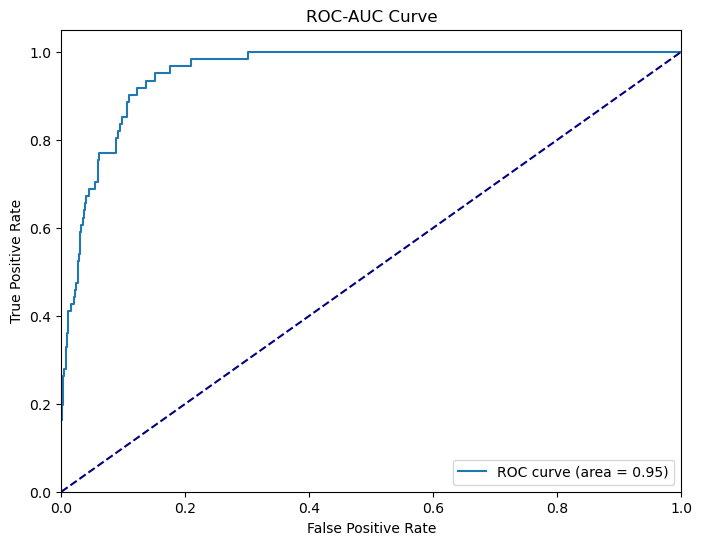

<Figure size 800x600 with 0 Axes>

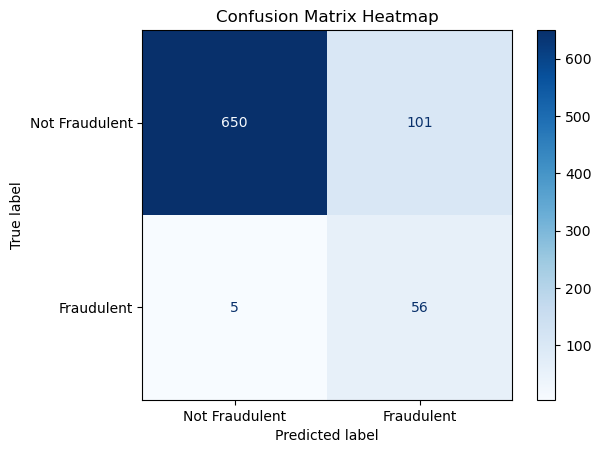

              precision    recall  f1-score   support

   Not Fraud       0.99      0.87      0.92       751
       Fraud       0.36      0.92      0.51        61

    accuracy                           0.87       812
   macro avg       0.67      0.89      0.72       812
weighted avg       0.94      0.87      0.89       812



In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

logistic_model = LogisticRegression()
logistic_model.fit(x_train_r, y_train_r)
logistic_model.score(x_val, y_val)

y_val_pred_prob = logistic_model.predict_proba(x_val)[:, 1] # Predicted probabilities for class 1 (Fraudulent)
y_val_pred = logistic_model.predict(x_val) # predicted labels

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Fraudulent", "Fraudulent"])

plt.figure(figsize=(8, 6))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Heatmap")
plt.show()

# Classification Report
print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))

### Shallow Neural Network Model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np

def neural_net_predictions(model, x):
    return (shallow_nn.predict(x).flatten() > 0.5).astype(int)

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train_r.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn.fit(x_train_r, y_train_r, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

neural_net_predictions(shallow_nn, x_val)

print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8486 - loss: 0.3910 - val_accuracy: 0.8017 - val_loss: 0.3518
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3543 - val_accuracy: 0.8042 - val_loss: 0.4019
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3352 - val_accuracy: 0.7980 - val_loss: 0.4008
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3414 - val_accuracy: 0.8005 - val_loss: 0.4272
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3304 - val_accuracy: 0.7968 - val_loss: 0.4357
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

   Not Fraud       0.99      0.78      0.88       751
       Fraud       0.26      0.95      0.41        61

    accuracy                           0.80       812
   macro avg       0.63      0.87      0.64       812
weighted avg  

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7414 - loss: 0.5414 - val_accuracy: 0.9150 - val_loss: 0.4835
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.4823 - val_accuracy: 0.9175 - val_loss: 0.4170
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4346 - val_accuracy: 0.8990 - val_loss: 0.4182
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8210 - loss: 0.4088 - val_accuracy: 0.8966 - val_loss: 0.4141
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8198 - loss: 0.4119 - val_accuracy: 0.8510 - val_loss: 0.6556
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


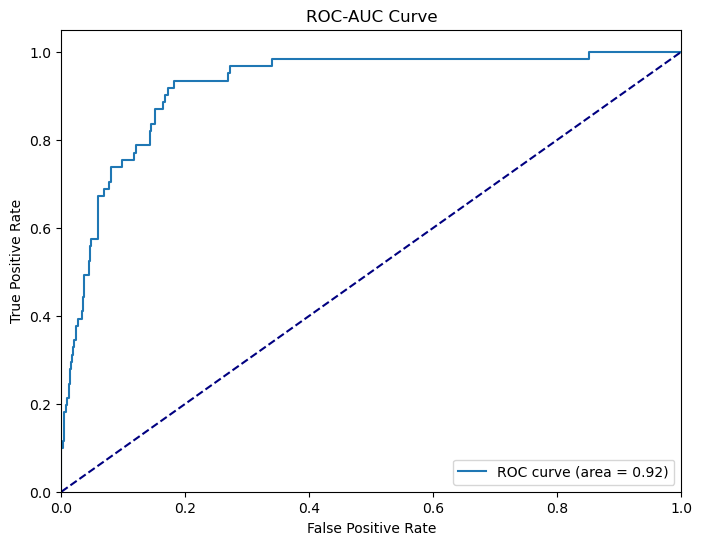

<Figure size 800x600 with 0 Axes>

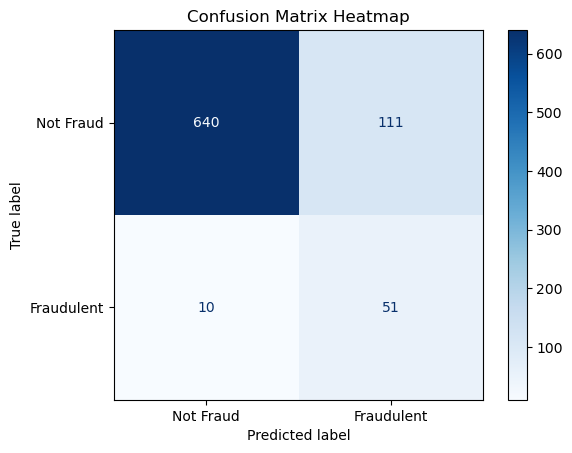

              precision    recall  f1-score   support

   Not Fraud       0.98      0.85      0.91       751
       Fraud       0.31      0.84      0.46        61

    accuracy                           0.85       812
   macro avg       0.65      0.84      0.69       812
weighted avg       0.93      0.85      0.88       812



In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np

def neural_net_predictions(model, x):
    return (shallow_nn.predict(x).flatten() > 0.5).astype(int)

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn.fit(x_train_r, y_train_r, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

y_val_pred_prob = shallow_nn.predict(x_val).flatten()
y_val_pred = neural_net_predictions(shallow_nn, x_val)

# ROC-AUC Curve and other metrics
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Fraud", "Fraudulent"])

plt.figure(figsize=(8, 6))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Heatmap")
plt.show()

print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))

### Random Forest Classifier Model

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train_r, y_train_r)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.80      0.89       751
       Fraud       0.28      0.95      0.43        61

    accuracy                           0.81       812
   macro avg       0.64      0.87      0.66       812
weighted avg       0.94      0.81      0.85       812



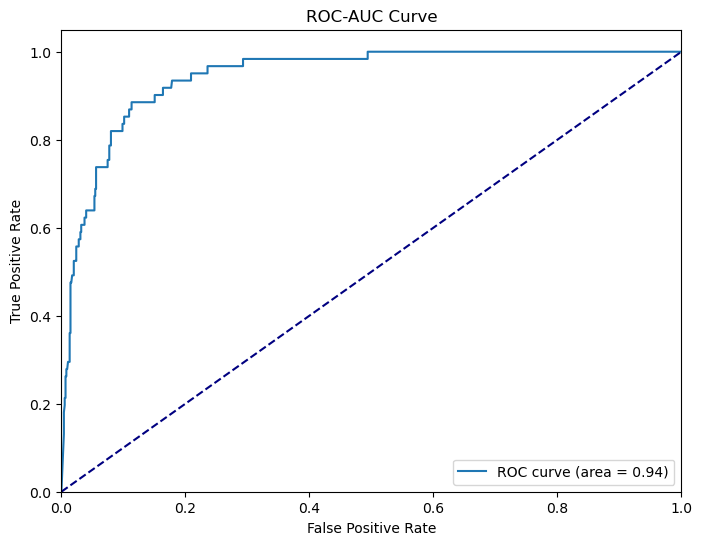

<Figure size 800x600 with 0 Axes>

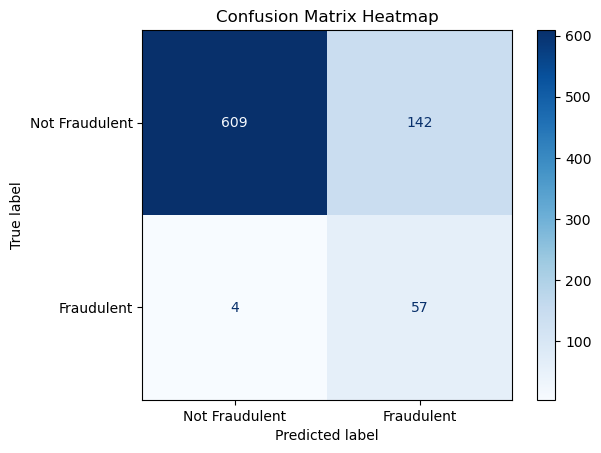

              precision    recall  f1-score   support

   Not Fraud       0.99      0.81      0.89       751
       Fraud       0.29      0.93      0.44        61

    accuracy                           0.82       812
   macro avg       0.64      0.87      0.67       812
weighted avg       0.94      0.82      0.86       812



In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train_r, y_train_r)

# Make predictions on the validation set
y_val_pred_prob = rf.predict_proba(x_val)[:, 1]  # Predicted probabilities for class 1 (Fraud)
y_val_pred = rf.predict(x_val)  # Predicted labels

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Fraudulent", "Fraudulent"])

plt.figure(figsize=(8, 6))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Heatmap")
plt.show()

# Classification Report
print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))


### Gradient Boosting Classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 50, learning_rate = 1.0, max_depth=1, random_state = 0)
gbc.fit(x_train_r, y_train_r)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.99      0.85      0.91       751
       Fraud       0.32      0.85      0.46        61

    accuracy                           0.85       812
   macro avg       0.65      0.85      0.69       812
weighted avg       0.94      0.85      0.88       812



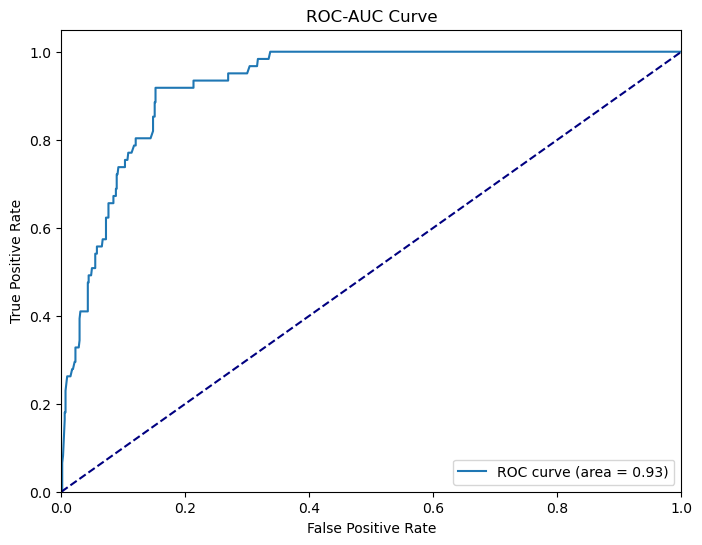

<Figure size 800x600 with 0 Axes>

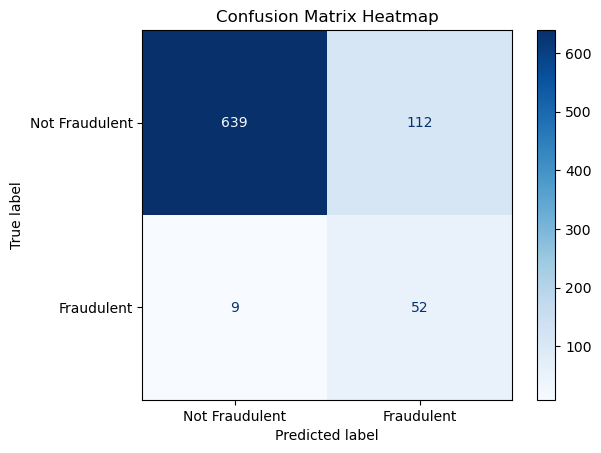

              precision    recall  f1-score   support

   Not Fraud       0.99      0.85      0.91       751
       Fraud       0.32      0.85      0.46        61

    accuracy                           0.85       812
   macro avg       0.65      0.85      0.69       812
weighted avg       0.94      0.85      0.88       812



In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 50, learning_rate = 1.0, max_depth=1, random_state = 0)
gbc.fit(x_train_r, y_train_r)

y_val_pred_prob = gbc.predict_proba(x_val)[:,1]
y_val_pred = gbc.predict(x_val)

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Fraudulent", "Fraudulent"])

plt.figure(figsize=(8, 6))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Heatmap")
plt.show()

# Classification Report
print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))

### Linear SVC Model

In [90]:
from sklearn.svm import LinearSVC

svc = LinearSVC(class_weight ='balanced')
svc.fit(x_train_r, y_train_r)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.99      0.87      0.92       751
       Fraud       0.34      0.85      0.49        61

    accuracy                           0.87       812
   macro avg       0.67      0.86      0.71       812
weighted avg       0.94      0.87      0.89       812



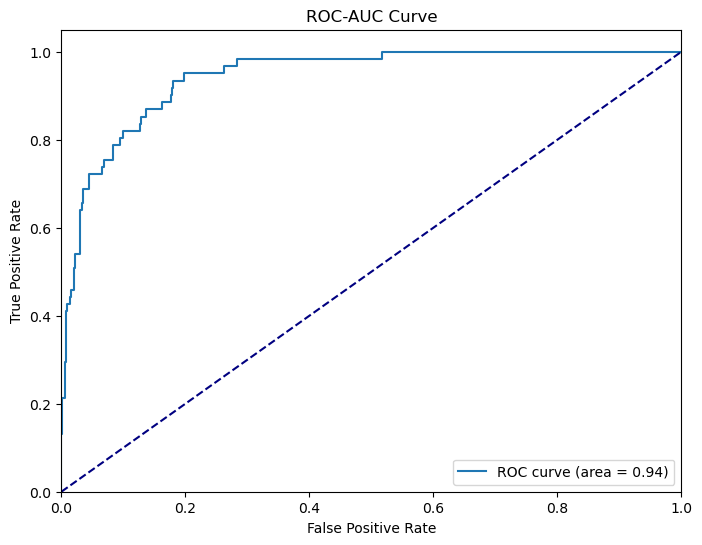

<Figure size 800x600 with 0 Axes>

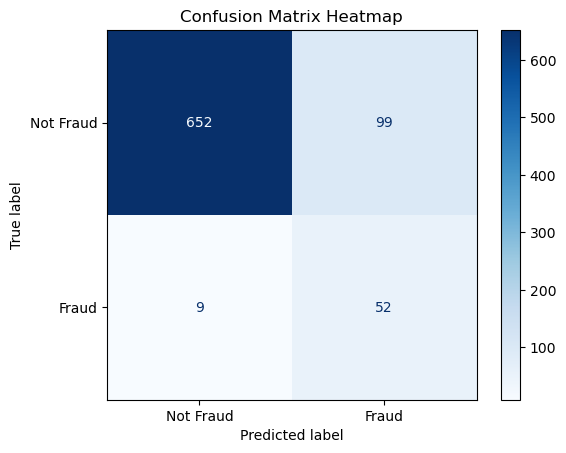

              precision    recall  f1-score   support

   Not Fraud       0.99      0.87      0.92       751
       Fraud       0.34      0.85      0.49        61

    accuracy                           0.87       812
   macro avg       0.67      0.86      0.71       812
weighted avg       0.94      0.87      0.89       812



In [91]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Linear SVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train_r, y_train_r)

# Predict class labels
y_val_pred = svc.predict(x_val)

# Get decision function scores for ROC-AUC
y_val_decision_scores = svc.decision_function(x_val)

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_decision_scores)
roc_auc = roc_auc_score(y_val, y_val_decision_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Fraud", "Fraud"])

plt.figure(figsize=(8, 6))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Heatmap")
plt.show()

# Classification Report
print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))

### XGBoost Model

[0]	train-logloss:0.56688	eval-logloss:0.84633
[1]	train-logloss:0.44675	eval-logloss:0.71219
[2]	train-logloss:0.37045	eval-logloss:0.60594
[3]	train-logloss:0.32695	eval-logloss:0.53780
[4]	train-logloss:0.29343	eval-logloss:0.50318
[5]	train-logloss:0.27023	eval-logloss:0.47753
[6]	train-logloss:0.24677	eval-logloss:0.45835
[7]	train-logloss:0.22312	eval-logloss:0.45372
[8]	train-logloss:0.20845	eval-logloss:0.44157
[9]	train-logloss:0.19545	eval-logloss:0.43608
[10]	train-logloss:0.18454	eval-logloss:0.43292
[11]	train-logloss:0.16856	eval-logloss:0.42807
[12]	train-logloss:0.16531	eval-logloss:0.42097
[13]	train-logloss:0.14682	eval-logloss:0.40567
[14]	train-logloss:0.14479	eval-logloss:0.40868
[15]	train-logloss:0.13318	eval-logloss:0.41016
[16]	train-logloss:0.12940	eval-logloss:0.40773
[17]	train-logloss:0.12355	eval-logloss:0.40067
[18]	train-logloss:0.11337	eval-logloss:0.39996
[19]	train-logloss:0.10688	eval-logloss:0.39834
[20]	train-logloss:0.09492	eval-logloss:0.40202
[2

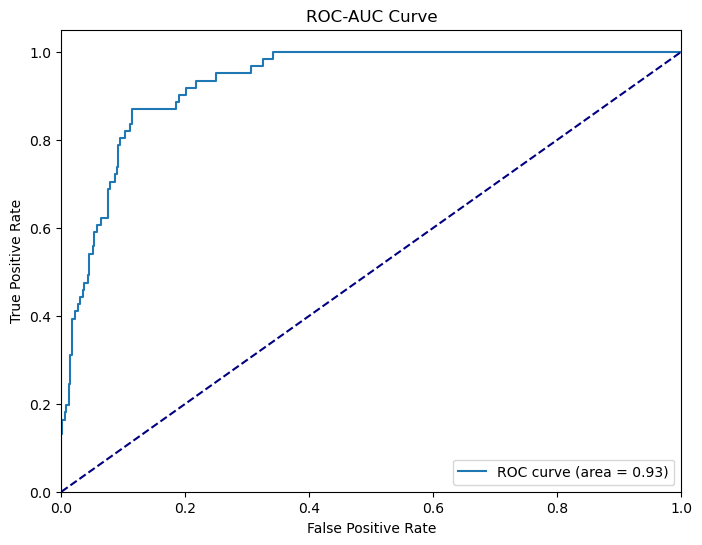

<Figure size 800x600 with 0 Axes>

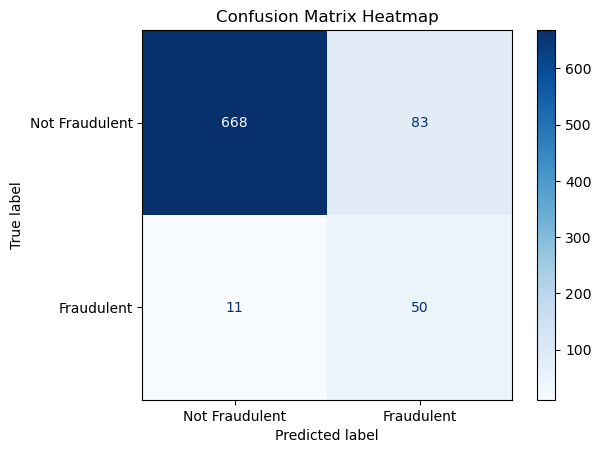

Test Set Accuracy: 0.8842
Classification Report:
               precision    recall  f1-score   support

   Not Fraud       0.98      0.89      0.93       751
       Fraud       0.38      0.82      0.52        61

    accuracy                           0.88       812
   macro avg       0.68      0.85      0.72       812
weighted avg       0.94      0.88      0.90       812



In [92]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(x_train_r, label=y_train_r)
dval = xgb.DMatrix(x_val, label=y_val)
dtest = xgb.DMatrix(x_test, label=y_test)

# Set up XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.3,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    'seed': 42
}

watchlist = [(dtrain, 'train'), (dval, 'eval')]  # Track training and validation performance

model = xgb.train(params, dtrain, num_boost_round=100, evals=watchlist, early_stopping_rounds=10)

y_pred_proba = model.predict(dval)  # Predicted probabilities
y_pred = [1 if y > 0.5 else 0 for y in y_pred_proba]  # Convert probabilities to binary predictions

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Fraudulent", "Fraudulent"])

plt.figure(figsize=(8, 6))
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Heatmap")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))

In [93]:
### Save the trained model for future testing ###
model.save_model("fraud_detection_xgboost_model_Aug_2024.json")